## **Documentation: Setting Up and Checking Logs in LangSmith**

LangSmith is a powerful tool for logging, monitoring, and debugging LangChain workflows. This guide will walk you through the setup process and provide an example of how to use LangSmith for logging.

---

---



### **1. Installation**

First, install the required libraries. Run the following command in your Python environment:



---

In [ ]:
%%capture --no-stderr
%pip install --quiet -U langchain_core langchain langsmith langgraph langchain_google_genai
 

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")
LANGSMITH_API_KEY = os.getenv("LANGSMITH_API_KEY")
if not GEMINI_API_KEY:
    raise ValueError("GEMINI_API_KEY is not set in the .env file.")
print("Gemini api key loaded successfully")

if not LANGSMITH_API_KEY:
    raise ValueError("LANGSMITH_API_KEY is not set in the .env file.")
print("LANGSMITH_API_KEY loaded successfully")

Gemini api key loaded successfully
LANGSMITH_API_KEY loaded successfully


### **2. Set Up Environment Variables**

LangSmith requires certain environment variables to be set for logging and tracing. Define these variables in your environment:


In [2]:
LANGSMITH_TRACING="true"
LANGSMITH_ENDPOINT="https://api.smith.langchain.com"
LANGSMITH_API_KEY=LANGSMITH_API_KEY
LANGSMITH_PROJECT="local_summary_demo" 

### **3. Set Environment Variables in Python**

Use the `os` module to set the environment variables in your Python script:

In [3]:
import os
 
os.environ["LANGCHAIN_TRACING_V2"] = LANGSMITH_TRACING
os.environ["LANGCHAIN_PROJECT"] = LANGSMITH_PROJECT
os.environ["LANGCHAIN_API_KEY"] = LANGSMITH_API_KEY

### **4. Example Code**

Here’s an example of a LangChain workflow with LangSmith logging enabled:

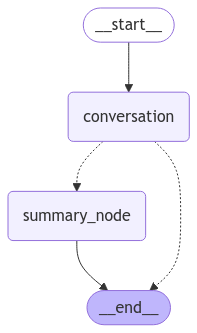

summary printing

summary printing

summary printing

summary printing

================================== Ai Message ==================================

You said you are majoring in math.


In [5]:
from langgraph.graph import START,END,StateGraph
from langgraph.checkpoint.memory import MemorySaver
from IPython.display import display,Image
from langchain_core.messages import HumanMessage,SystemMessage,RemoveMessage
from langgraph.graph import MessagesState
from langchain_core.messages import AnyMessage
from langgraph.graph import add_messages
from typing import Annotated
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash",api_key=GEMINI_API_KEY  )

class StateClass(MessagesState):
    summary: str
    messages:Annotated[list[AnyMessage],add_messages]
    
def start_conversation(state:StateClass):
    summary = state.get('summary','')
    print("summary printing")
    print(summary)
    
    if summary:
        system_message = f"Summary of conversation earlier: {summary}"
        messages = [SystemMessage(content = system_message)] +state['messages']
    else:
        messages = state['messages']
    result =  llm.invoke(messages)
    return {'messages':result}     
            
def call_summary(state:StateClass):
    summary = state.get('summary','')
    if summary:
         
        human_message = (
            f"This is summary of the conversation to date: {summary}\n\n"
            "Extend the summary by taking into account the new messages above:"
        )
    else:
        human_message = "Create a summary of the conversation above:"
            
    messages = state['messages'] + [HumanMessage(content = human_message)]
    generate_summary = llm.invoke(messages)
     
        
    last_two_messages = [RemoveMessage(id=i.id) for i in state['messages'][:-2]] 
    return { 'summary':generate_summary.content,'messages':last_two_messages,}   
        
def decide_node(state:StateClass):
    messages = state['messages']
    if len(messages) > 6:
        return "summary_node"
    else:
        return END
 
memory = MemorySaver()

graph_building: StateGraph = StateGraph(StateClass)
graph_building.add_node("conversation", start_conversation)
graph_building.add_node("summary_node",call_summary)

graph_building.add_edge(START, "conversation")
graph_building.add_conditional_edges("conversation", decide_node)
graph_building.add_edge("summary_node", END)
 
 
 
 
 
final_graph  = graph_building.compile(checkpointer=memory)
display(Image(final_graph.get_graph().draw_mermaid_png())) 

  
config = {'configurable': {'thread_id':'1'}}

input = HumanMessage(content="Hi I am aramn")
final_resp =final_graph.invoke({"messages":[input]},config)
 

input = HumanMessage(content="I Like Programming")
final_resp =final_graph.invoke({"messages":[input]},config)
 

input = HumanMessage(content="I am major in math")
final_resp =final_graph.invoke({"messages":[input]},config)

input = HumanMessage(content="what is major i am")
final_resp =final_graph.invoke({"messages":[input]},config)
 
for m in final_resp['messages'][-1:]:
    m.pretty_print()   
 

---

### **5. Checking Logs in LangSmith**

Once your code runs, you can check the logs in the LangSmith dashboard:

1. **Log in to LangSmith:**
   - Go to [LangSmith Dashboard](https://smith.langchain.com/).

2. **Navigate to Your Project:**
   - Select the project name you specified in `LANGSMITH_PROJECT` (e.g., `summary_demo`).

3. **View Traces:**
   - You will see a list of traces for each run of your workflow.
   - Click on a trace to view detailed logs, including inputs, outputs, and intermediate steps.

4. **Filter and Search:**
   - Use filters to search for specific runs, tags, or metadata.


---

 
### Summary

1. Install the required libraries.
2. Set up LangSmith environment variables.
3. Use `os.environ` to configure LangSmith in your Python script.
4. Run your LangChain workflow and check logs in the LangSmith dashboard.
5. Use LangSmith for debugging, monitoring, and performance analysis.
---